In machine learning, classification involves categorizing known classes. For instance, one could differentiate between the most profitable and non-interested customers from a dataset for the purpose of advertising a particular product. This process of classification can be used to gain valuable insights into customer behavior and preferences, allowing businesses to tailor their marketing strategies accordingly.

## Problem Definition
Classification is the process of categorizing known classes based on their features. In most classification problems, machine learning algorithms are used to complete the task; however, when classifying a large dataset of images, a neural network is necessary. In this project, I will go  through the process of image classification with a neural network using Python. We will be using the renowned MNIST fashion dataset, which contains 70,000 clothing fashion images. Our goal is to train an image classification model with neural networks.


I will start this task by importing the necessary Python libraries and the dataset:

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Before moving forward, let’s have a quick look at one of the samples of the images from the dataset:

Image Label : 5


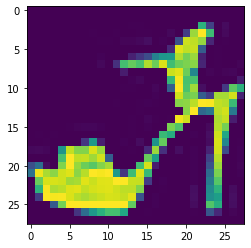

In [3]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image);

Now let’s have a look at the shape of both the training and test data:

In [4]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


## Building a Neural Network 
Now I will build a neural network architecture with two hidden layers:

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


Before training our model, I will split the training data into training and validation sets:

In [6]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

## Training a Classification Model with Neural Networks


In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30, 
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 11s 5ms/step - loss: 0.7141 - accuracy: 0.7653 - val_loss: 0.5065 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4879 - accuracy: 0.8294 - val_loss: 0.4393 - val_accuracy: 0.8518
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4387 - accuracy: 0.8467 - val_loss: 0.4095 - val_accuracy: 0.8650
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4103 - accuracy: 0.8569 - val_loss: 0.4518 - val_accuracy: 0.8328
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3904 - accuracy: 0.8633 - val_loss: 0.4197 - val_accuracy: 0.8488
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3744 - accuracy: 0.8683 - val_loss: 0.3618 - val_accuracy: 0.8748
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3609 - accuracy: 0.8732 - val_loss: 0.3495 - val_accuracy

Now let’s have a look at the predictions:

In [8]:
new = xtest[:10]
predictions = model.predict(new)
print(predictions)

1/1 [==============================] - 0s 134ms/step
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.99999994]
 [0.         0.         0.99999994 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.99999994 0.         0.         0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.99999994 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.99999994 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.     

Here is how we can look at the predicted classes:

In [9]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6 1 4 6 5 7]


So this is how you can train a classification model with neural networks